# Unidad 2 - Práctica 1

## Selección de variables - Métodos no jerárquicos

In [1]:
library(readxl)
actitud_compras <- read_excel("datasets/Actitud_Compras.xlsx", sheet="Hoja1")
actitud_compras

Caso,X1,X2,X3,X4,X5,X6,sexo,edad
1,6,4,7,3,2,3,Mujer,20-30
2,2,3,1,4,5,4,Hombre,31-40
3,7,2,6,4,1,3,Mujer,20-30
4,4,6,4,5,3,6,Mujer,41-mas
5,1,3,2,2,6,4,Mujer,31-40
6,6,4,6,3,3,4,Mujer,20-30
7,5,3,6,3,3,4,Mujer,20-30
8,7,3,7,4,1,4,Mujer,31-40
9,2,4,3,3,6,3,Hombre,31-40
10,3,5,3,6,4,6,Hombre,31-40


In [2]:
#Hartigan and Wong is used by default.
act_compras_kmeans <- kmeans(actitud_compras[,2:7], centers=3, algorithm="Hartigan-Wong")
act_compras_kmeans

K-means clustering with 3 clusters of sizes 6, 6, 8

Cluster means:
        X1       X2       X3    X4    X5       X6
1 1.666667 3.000000 1.833333 3.500 5.500 3.333333
2 3.500000 5.833333 3.333333 6.000 3.500 6.000000
3 5.750000 3.625000 6.000000 3.125 1.875 3.875000

Clustering vector:
 [1] 3 1 3 2 1 3 3 3 1 2 1 3 1 2 3 2 3 2 2 1

Within cluster sum of squares by cluster:
[1] 20.50000 25.16667 34.00000
 (between_SS / total_SS =  75.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

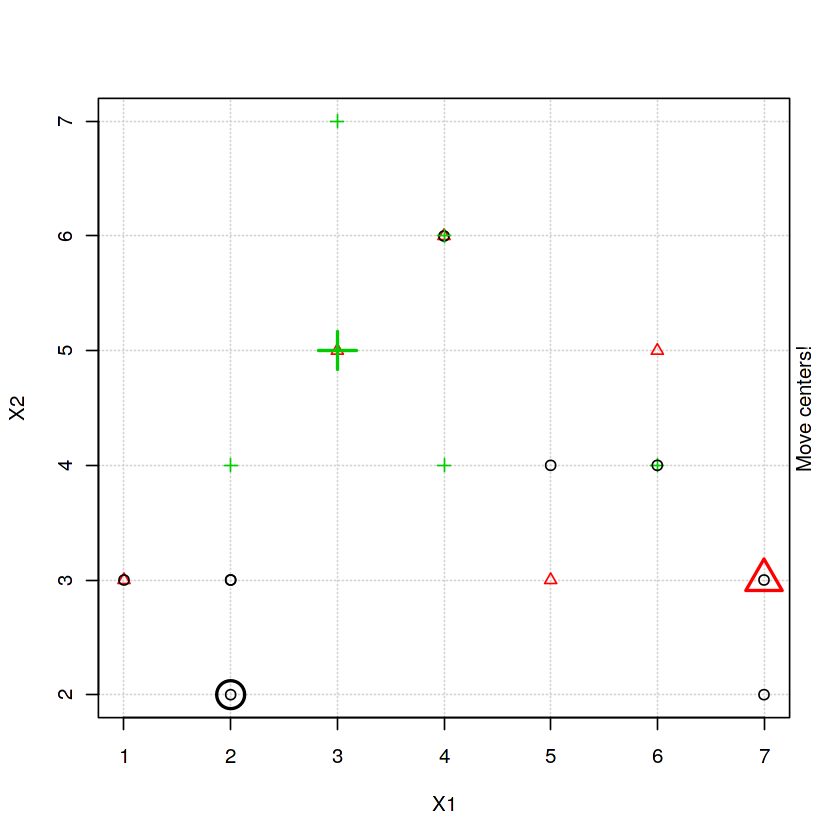

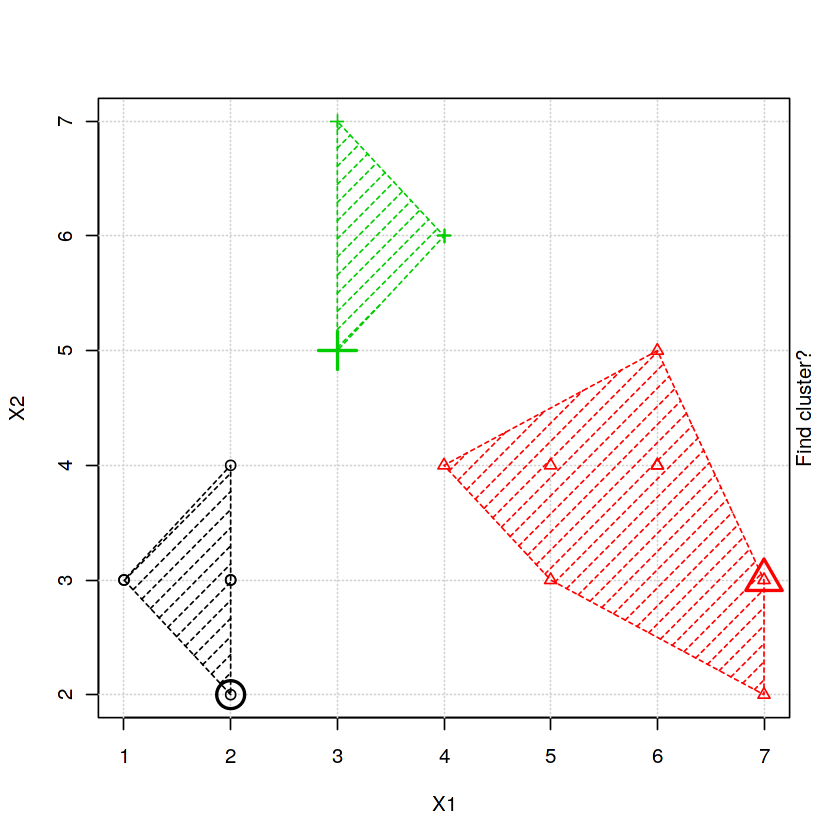

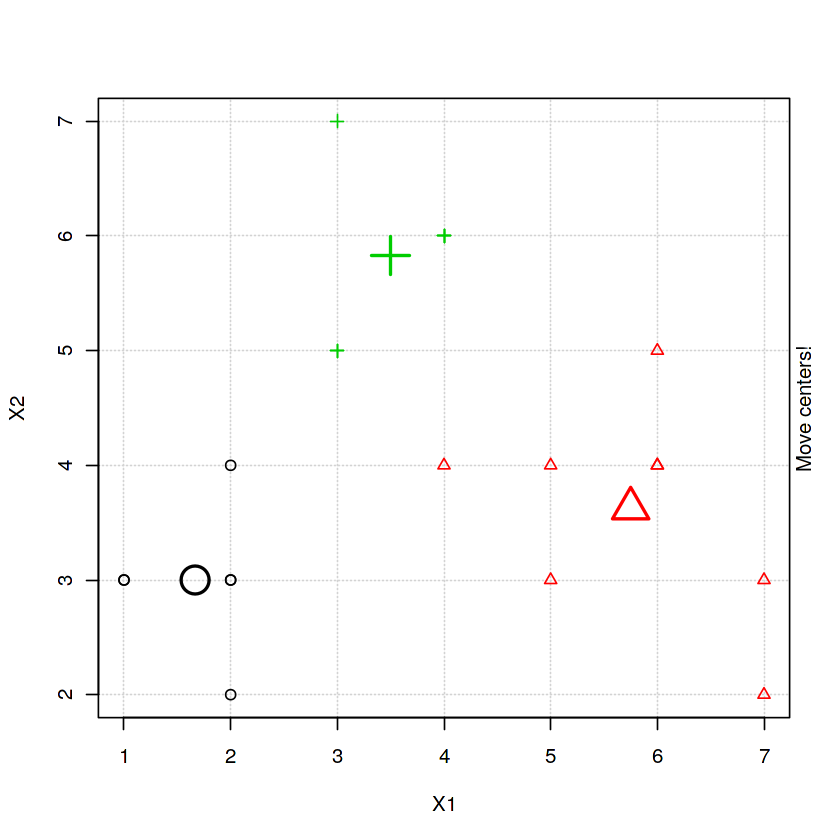

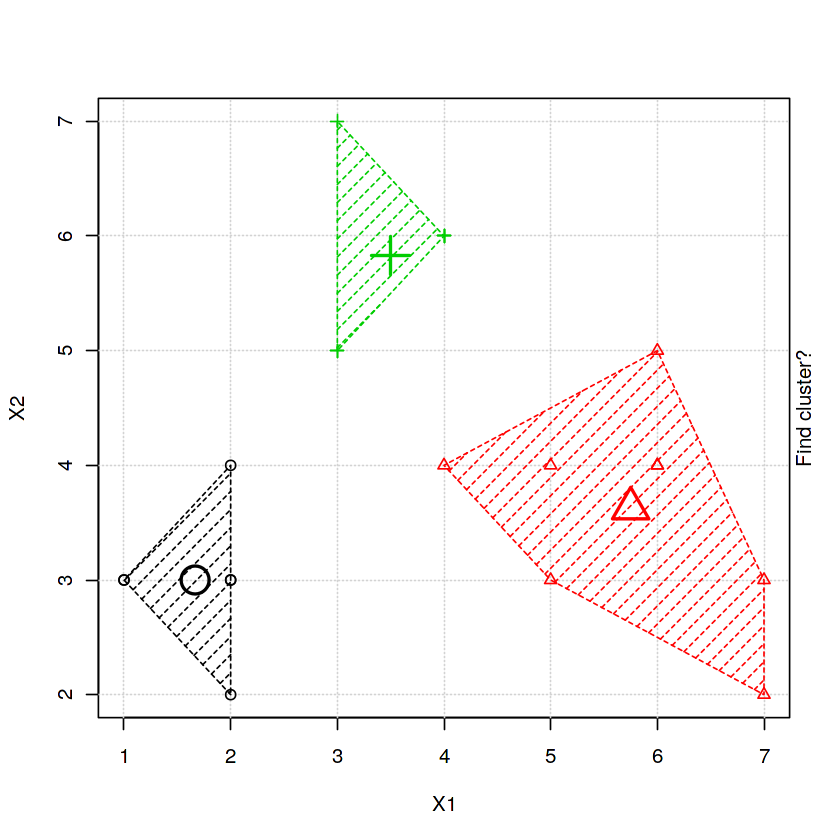

In [3]:
library(animation)
kmeans.ani(actitud_compras[,2:7], centers=3)

In [4]:
round(act_compras_kmeans$centers,3)

X1,X2,X3,X4,X5,X6
1.667,3.000,1.833,3.500,5.500,3.333
3.500,5.833,3.333,6.000,3.500,6.000
5.750,3.625,6.000,3.125,1.875,3.875


In [5]:
actitud_compras <- cbind(actitud_compras, cluster=act_compras_kmeans$cluster)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



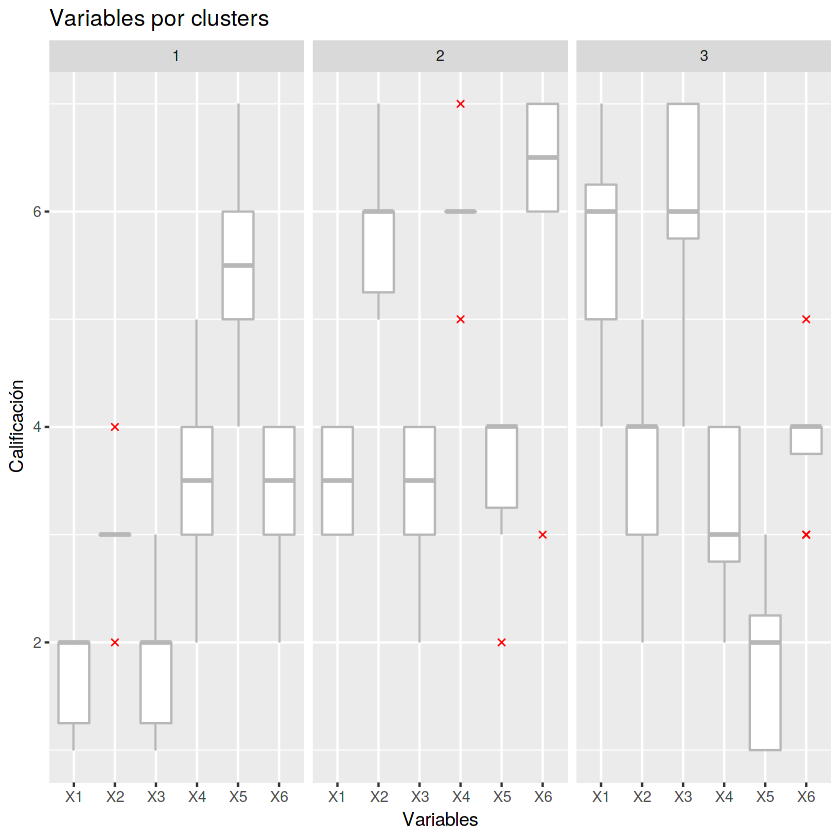

In [6]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(ggrepel)

actitud_compras_long <- actitud_compras[,c(1:7,10)] %>%
    gather(key=variable, value=valor, -c(Caso, cluster))

# Para boxplot, x tiene que ser categórica
ggplot(actitud_compras_long, aes(x=variable, y=valor, label=cluster))+
    geom_boxplot(color="#B7B7B7", outlier.color="red", outlier.shape = 4)+
    #geom_jitter()+
    facet_grid('cluster')+
    labs(
        title = "Variables por clusters"
        #,subtitle = "Calificación por materia"
        ,x = "Variables"
        ,y = "Calificación"
    )

In [7]:
table(actitud_compras$cluster, actitud_compras$sexo)

   
    Hombre Mujer
  1      5     1
  2      2     4
  3      0     8

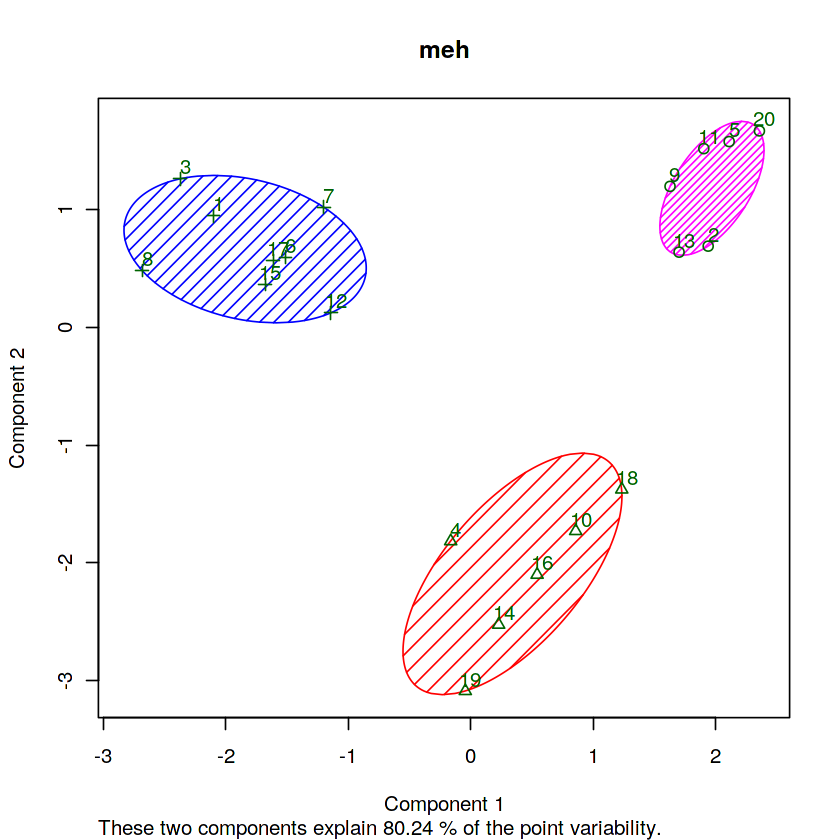

In [9]:
library(cluster)
clusplot(actitud_compras[,c(2:7)], actitud_compras$cluster, main="meh", color=TRUE, shade=TRUE, labels=3, lines=0)

In [3]:
library(factoextra)
fviz_cluster(act_compras_kmeans, data = actitud_compras[,c(2:7)])

ERROR: Error in inherits(object, c("partition", "hkmeans", "eclust")): object 'act_compras_kmeans' not found
